https://github.com/samirelanduk/ZincBindPredict

https://academic.oup.com/database/article/doi/10.1093/database/baz006/5304468

In [1]:
import tensorflow as tf
import pandas as pd

import datetime
import os

import numpy as np

import glob

# Load the TensorBoard notebook extension
%load_ext tensorboard

In [2]:
#import utilities

#utilities.get_all_pdb_codes()

In [3]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

%matplotlib inline

In [20]:
files = glob.glob("csv/sequence/*.csv")

df = pd.read_csv(files[0])
df["Type"] = 0

for idx, file in enumerate(files[1:]):

    print(f"Appending {file}")
    df_temp = pd.read_csv(file)
    df_temp["Type"] = idx+1
    df = df.append(df_temp)

Appending csv/sequence/H3.csv
Appending csv/sequence/C2H2.csv
Appending csv/sequence/C3H1.csv
Appending csv/sequence/E1H1.csv
Appending csv/sequence/C2H1.csv
Appending csv/sequence/D1H1.csv
Appending csv/sequence/E1H2.csv
Appending csv/sequence/D1H2.csv
Appending csv/sequence/C3.csv


In [21]:
df.shape

(51042, 74)

In [22]:
df = df.dropna()

In [23]:
y = df["positive"]
zinc_type = df["Type"]
X = df.drop(["positive"], axis=1)

Feature: 0, gap1 Score: 0.67502
Feature: 1, hydrophobicity1 Score: 0.01901
Feature: 2, gap2 Score: 0.05241
Feature: 3, hydrophobicity2 Score: 0.00535
Feature: 4, gap3 Score: 0.15102
Feature: 5, hydrophobicity3 Score: 0.00599
Feature: 6, hydrophobicity_window_1 Score: 0.00293
Feature: 7, hydrophobicity_window_3 Score: 0.00255
Feature: 8, hydrophobicity_window_5 Score: 0.00182
Feature: 9, charged_window_1 Score: 0.00099
Feature: 10, charged_window_3 Score: 0.00275
Feature: 11, charged_window_5 Score: 0.00170
Feature: 12, A_window_1 Score: 0.00082
Feature: 13, A_window_3 Score: 0.00154
Feature: 14, A_window_5 Score: 0.00114
Feature: 15, R_window_1 Score: 0.00045
Feature: 16, R_window_3 Score: 0.00094
Feature: 17, R_window_5 Score: 0.00139
Feature: 18, N_window_1 Score: 0.00048
Feature: 19, N_window_3 Score: 0.00105
Feature: 20, N_window_5 Score: 0.00076
Feature: 21, D_window_1 Score: 0.00033
Feature: 22, D_window_3 Score: 0.00206
Feature: 23, D_window_5 Score: 0.00268
Feature: 24, C_windo

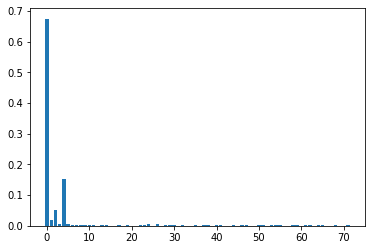

In [8]:
model = DecisionTreeClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, %s Score: %.5f' % (i,df.columns[i], v))
    
print(df.columns[np.argsort(-importance)])

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [9]:
df

,gap1,hydrophobicity1,gap2,hydrophobicity2,gap3,hydrophobicity3,hydrophobicity_window_1,hydrophobicity_window_3,hydrophobicity_window_5,charged_window_1,...,W_window_1,W_window_3,W_window_5,Y_window_1,Y_window_3,Y_window_5,V_window_1,V_window_3,V_window_5,positive
0,8,0.535,2.0,0.485,2.0,0.410,0.315,0.168,0.246,0.250,...,0.0,0.000,0.000,0.0,0.042,0.025,0.000,0.000,0.000,1
1,8,0.535,2.0,0.485,2.0,0.410,0.315,0.168,0.246,0.250,...,0.0,0.000,0.000,0.0,0.042,0.025,0.000,0.000,0.000,1
2,2,0.530,13.0,0.015,2.0,1.015,0.463,0.210,0.115,0.375,...,0.0,0.000,0.000,0.0,0.000,0.025,0.125,0.208,0.125,1
3,5,0.658,9.0,0.317,2.0,0.580,0.448,0.375,0.361,0.375,...,0.0,0.000,0.000,0.0,0.042,0.025,0.000,0.042,0.025,1
4,2,0.530,13.0,0.015,2.0,1.015,0.463,0.210,0.115,0.375,...,0.0,0.000,0.000,0.0,0.000,0.025,0.125,0.208,0.125,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,30,0.151,40.0,0.096,86.0,0.362,-0.025,-0.141,0.013,0.000,...,0.0,0.000,0.000,0.0,0.042,0.050,0.000,0.000,0.025,0
10996,0,0.000,118.0,0.324,49.0,0.183,0.506,0.350,0.228,0.375,...,0.0,0.000,0.025,0.0,0.042,0.050,0.000,0.042,0.075,0
10997,2,0.705,6.0,0.150,6.0,-0.137,0.357,0.191,0.169,0.250,...,0.0,0.042,0.050,0.0,0.000,0.000,0.250,0.083,0.075,0
10998,52,0.047,33.0,0.466,223.0,0.204,0.272,0.265,0.244,0.250,...,0.0,0.000,0.000,0.0,0.000,0.000,0.125,0.083,0.100,0


In [10]:
df = df[["gap1", "gap2", "gap3", "positive"]]

In [11]:
inputs_to_model = tf.keras.layers.Input([df.shape[1]-1], name="myInput")   

layer1 = tf.keras.layers.Dense(units=256, activation="relu", name="myLayer1")(inputs_to_model)

layer2 = tf.keras.layers.Dense(units=100, activation="relu", name="yourLayer2")(layer1)


outputs_to_model = tf.keras.layers.Dense(units=1, activation="sigmoid", name="myPrediction")(layer2)

In [12]:
model = tf.keras.models.Model(inputs=[inputs_to_model], outputs=[outputs_to_model])

model.summary()  # Ask Keras to print the model summary

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
myInput (InputLayer)         [(None, 3)]               0         
_________________________________________________________________
myLayer1 (Dense)             (None, 256)               1024      
_________________________________________________________________
yourLayer2 (Dense)           (None, 100)               25700     
_________________________________________________________________
myPrediction (Dense)         (None, 1)                 101       
Total params: 26,825
Trainable params: 26,825
Non-trainable params: 0
_________________________________________________________________


In [13]:
metrics = [
#       tf.keras.metrics.TruePositives(name='tp'),
#       tf.keras.metrics.FalsePositives(name='fp'),
#       tf.keras.metrics.TrueNegatives(name='tn'),
#       tf.keras.metrics.FalseNegatives(name='fn'), 
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),
#       tf.keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

In [14]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=metrics)

In [15]:
train = df.sample(frac=0.8,random_state=816) #random state is a seed value
test = df.drop(train.index)

In [16]:
y_train = train["positive"]
x_train = train.iloc[:, :-1]

y_test = test["positive"]
x_test = test.iloc[:, :-1]


In [17]:
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [18]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 15721), started 0:30:39 ago. (Use '!kill 15721' to kill it.)

In [19]:
number_of_epochs = 30
model.fit(x_train, y_train, epochs=number_of_epochs, batch_size=16, 
          verbose=1, validation_data=(x_test, y_test), 
          callbacks=[tensorboard_callback])

Epoch 1/30
1687/1687 [==============================] - 18s 10ms/step - loss: 0.4012 - accuracy: 0.8647 - precision: 0.9040 - recall: 0.8091 - auc: 0.9413 - val_loss: 0.1713 - val_accuracy: 0.9434 - val_precision: 0.8127 - val_recall: 0.8453 - val_auc: 0.9704
Epoch 2/30
1687/1687 [==============================] - 20s 12ms/step - loss: 0.2006 - accuracy: 0.9396 - precision: 0.9237 - recall: 0.9568 - auc: 0.9744 - val_loss: 0.1551 - val_accuracy: 0.9401 - val_precision: 0.7391 - val_recall: 0.9742 - val_auc: 0.9820
Epoch 3/30
1687/1687 [==============================] - 15s 9ms/step - loss: 0.1629 - accuracy: 0.9450 - precision: 0.9302 - recall: 0.9625 - auc: 0.9790 - val_loss: 0.1829 - val_accuracy: 0.9234 - val_precision: 0.6818 - val_recall: 0.9885 - val_auc: 0.9827
Epoch 4/30
1687/1687 [==============================] - 25s 15ms/step - loss: 0.1468 - accuracy: 0.9506 - precision: 0.9350 - recall: 0.9689 - auc: 0.9824 - val_loss: 0.1588 - val_accuracy: 0.9359 - val_precision: 0.7298 

In [25]:
zinc_type.unique()

array([0, 2, 3])